<a href="https://colab.research.google.com/github/JhonataEzequiel/ProvaIA/blob/main/Prova_1_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aluno: Jhonata Ezequiel Alves de Miranda

Matrícula: 20190046473

1 - (1 Ponto) Para cada um dos agentes a seguir, desenvolva uma descrição
completando a tabela abaixo sobre o ambiente de tarefas de cada um.

(a) Agente comentarista de jogo.

(b) Agente sugestor de vinho.

(c) Agente treinador de time (como de basquete).

Respostas: 

a) 
medidas de desempenho: porcentagem de frases ditas corretamente durante a narração, quantidade de lances previstos com sucesso pouco tempo antes de acontecerem;

ambiente: partida atual ou antiga de um jogo;

atuadores: alto-falantes;

sensores: algorítmo de análise de vídeos.

b)
medidas de desempenho: média de aprovação dos clientes em relação a suas recomendações;

ambiente: aplicativo de delievery de bebidas;

atuadores: mensagens e notificações no aplicativo;

sensores: coleta de dados de avaliação de determinado vinho.

c)
medidas de desempenho: melhoria do desempenho individual dos jogadores nas partidas (pontos marcados, passes acertados, etc), e quantidade de partidas ganhas;

ambiente: quadra de basquete;

atuadores: exibir sugestões em vídeos de estratégias e treinamentos para o time;

sensores: detecção de lances, e dados físicos individuais dos jogadores (como peso, massa muscular, dieta, etc).

2 - (2 Pontos) Diferencie os 4 tipos de aprendizado de máquina. Para tanto, escolha
uma base de dados do Kaggle e explique como aplicar os 4 métodos nessa mesma
base

Respostas:

Link da base de dados: https://www.kaggle.com/datasets/jordancarlen/host-deaths-to-malenia-blade-of-miquella

Base de dados: mortes ocasionadas por um chefe chamado “Malenia, lâmina de Miquela”, no jogo Elden Ring. OBS: a palavra “build” refere-se a maneira como o jogador construiu seu personagem, investindo pontos de experiência para cria-lo. Por exemplo, um mago precisa de bastante inteligência, então a “build” de um mago focaria neste atributo.

O aprendizado supervisionado parte do princípio de que os rótulos das instâncias já são conhecidas, e quando uma nova é introduzida a IA tenta identificar a qual rótulo ela pertence. No caso dessa base de dados, seria possível determinar se a morte foi causada pelo ataque “waterflow dance” dependendo do tipo de build do personagem do jogador, já que jogadores magos tendem a possuir menos pontos de vida, portanto são mais sucetíveis a este ataque. O tipo de build já seria conhecido pela IA.

No não-supervisionado, o rótulo das instâncias da base de dados são desconhecidas, e a IA tenta agrupar automaticamente os dados. Nesse caso,  é possível identifcar que os jogadores que demoraram mais a morrer podem estar em uma categoria diferente dos jogadores que morrem mais rapidamente no chefe.

No semi-supervisionado, são conhecidos alguns rótulos de alguns exemplos e outros não, e cabe a IA decidir onde um novo exemplo se encaixará. Caso na base de dados em questão houver algum exemplo não rotulado, como a build do personagem não sendo dita, e um novo exemplo fosse inserido sem rótulo, a IA poderia averiguar os dados nele e junta-lo com outros exemplos parecidos, sendo rotulados ou não.

Na aprendizagem por reforço, através da tentativa e erro a IA pode gerar resultados. É possível testar se determinadas builds são melhores contra o chefe em questão, se a porcentagem de personagens que morreram usando elas é pequena.

3 - (5 Pontos) Em um Jupyter Notebook (link do collab, GitHub ou arquivo), utilize o
método K vizinhos mais próximos na base escolhida na questão anterior para um
contexto SUPERVISIONADO e para classificação:
1. Aplique processos de pré-processamento e os necessários para execução do
método K-NN.
2. Aplique correlação ou PCA e seleciona um número menor de atributos com
esses métodos e justifique sua decisão.
3. Escolha 5 valores de K e mostre os resultados (escolha 3 métricas de
avaliação e mostre a matriz de confusão) e explique os resultados
encontrados.
4. Escolha 2 métricas de similaridade (diferentes distâncias ou outras métricas -
correlação, por exemplo) para definir o(s) vizinho(s) mais próximos e explique
os resultados encontrados.
5. Melhor K e melhor distância e testar com o conjunto de atributos do item 2.

In [ ]:
#topico 1.
#este codigo precisara ser rodado para que os outros funcionem
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import confusion_matrix

base = pd.read_csv('malenia.csv')
base = base.dropna()

#dividindo a base em duas, a primeira vai servir como medidas para determinar qual a build do jogador. A segunda será as builds que ja estao na base de dados
#As medidas escolhidas foram as que achei necessarias para a predicao
x = base[['Host_Death_Time', 'Level', 'Phase', 'Waterflow_Death', 'Health_Pct', 'Phantom_Count', 'Phantom_Death']]
y = base[['Host_Build']]

#divindo a base de dados em testes e treinamento
X_train, X_test, y_train, y_test = train_test_split(x, np.ravel(y), random_state = 100)

#criando um objeto classificador usando a metrica euclidiana, procurando por 5 vizinhos mais proximos, 
clf = KNeighborsClassifier(p=2, n_neighbors=5, weights = 'distance', algorithm = 'auto')

#retirando as duplicatas
X_train.drop_duplicates()

#iniciando o algoritmo para comecar o treinamento
clf.fit(X_train, y_train)

In [ ]:
#predizendo a build do jogador
predic = clf.predict(X_test)
print(predic)

In [ ]:
#acuracia do algoritmo
print(accuracy_score(y_test, predic))

In [ ]:
#matriz de confusao

mC = metrics.confusion_matrix(y_test, predic)
print("Matriz de Confusão:\n",mC)

Eu acredito que o resultado da acurácia não foi tão alto, pois há outros fatores que influeciam nas mortes dos jogadores, como a habilidade individual

In [ ]:
#topico 2.

#preparacao para a construcao do pca
X_Train = X_train.values
X_Train = np.asarray(X_Train)

# Encontrando o Array normalizado de X_Train
X_std=StandardScaler().fit_transform(X_Train)

#verificando a quantidade de atributos que serao usados no pca
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Numero de componentes')

#nao sei se a traducao correta eh essa, mas o intuito era representar a "Explained Variance Ratio"
plt.ylabel('Proporcao da Variancia Explicada')

A escolha de 5 atributos foi feita a partir do resultado anterior, que mostrou que 100% da variância pode ser explicada a partir desses 5

In [ ]:
sklearn_pca = PCA(n_components=5)
X_Train = sklearn_pca.fit_transform(X_std)

#interface para vizualizar os resultados
sns.set(style='darkgrid')
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.kdeplot(X_Train[:,0], X_Train[:,1], cmap="Greens",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(X_Train[:,1], X_Train[:,2], cmap="Reds",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(X_Train[:,2], X_Train[:,3], cmap="Blues",
          shade=True, shade_lowest=False)
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
green = sns.color_palette("Greens")[-2]
ax.text(0.5, 0.5, "segunda e terceira projecao", size=12, color=blue)
ax.text(-4, 0.0, "primeira e terceira projecao", size=12, color=red)
ax.text(2, 0, "primeira e segunda projecao", size=12, color=green)
plt.xlim(-6,5)
plt.ylim(-2,2)

In [ ]:
#topico 3.

#selecionando os 5 primeiros valores da base (dados de treinamento)

#f5 eh equivalente ao X_train do topico 1 e tgr5 ao Y_train
f5 = base.iloc[[0,1,2,3,4]] #f5 significa first 5
trg = f5[['Host_Build']] #trg significa target 

f5 = f5[['Host_Death_Time', 'Level', 'Phase', 'Waterflow_Death', 'Health_Pct', 'Phantom_Count', 'Phantom_Death']]

#selecionando os 5 seguintes (dados de teste)

#n5 eh equivalente ao X_test, e trg10 ao y_test
n5 = base.iloc[[5,6,7,8,9]] #n5 significa next 5
trg1 = n5[['Host_Build']] #trg10 significa target 1

n5 = n5[['Host_Death_Time', 'Level', 'Phase', 'Waterflow_Death', 'Health_Pct', 'Phantom_Count', 'Phantom_Death']]

clf1 = KNeighborsClassifier(p=1, n_neighbors=5, weights = 'distance', algorithm = 'auto')

clf1.fit(f5, np.ravel(trg))

KNeighborsClassifier(p=1, weights='distance')

In [ ]:
#valores preditos
predic1 = clf1.predict(n5)
print(predic1)

['HYBRID' 'RAW_MELEE' 'HYBRID' 'PROC_CAST' 'HYBRID']


In [ ]:
#acuracia do algoritmo
print(accuracy_score(trg1, predic1))

0.2


In [ ]:
#valores corretos
certos = base.iloc[[5,6,7,8,9]]
certos

,Host_Death_Time,Host_Build,Level,Phase,Waterflow_Death,Health_Pct,Location,Phantom_Count,Phantom_Build,Phantom_Death
7,73.0,HYBRID,172.0,1.0,True,86.0,INNER,2.0,PROC_CAST,True
8,292.0,RAW_CAST,133.0,1.0,True,12.0,INNER,2.0,HYBRID,False
10,79.0,RAW_CAST,137.0,1.0,False,62.0,OUTER,2.0,PROC_CAST,False
11,159.0,RAW_MELEE,139.0,2.0,False,21.0,INNER,2.0,HYBRID,False
13,288.0,PROC_MELEE,173.0,2.0,False,71.0,OUTER,2.0,PROC_MELEE,True


Matriz de confusão:

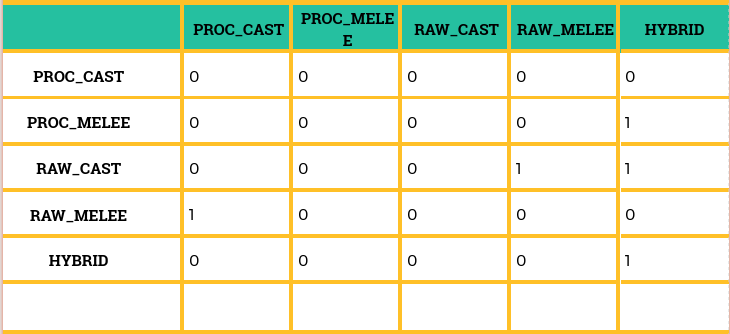

Organizando os valores, temos:

PROC_CAST:

VP = 0; VN = 4; FP = 0; FN = 1.

PROC_MELEE:

VP = 0; VN = 3; FP = 1; FN = 0.

RAW_CAST:

VP = 0; VN = 3; FP = 2; FN = 0.

RAW_MELEE:

VP = 0; VN = 3; FP = 1; FN = 1.

HYBRID:

VP = 1; VN = 2; FP = 0; FN = 2.

In [ ]:
#Calculando a acuracia media
def acu(vp, vn, fp, fn):
    ac = (vp+vn)/(vp+vn+fp+fn)
    return ac

acu_med = (acu(0,4,0,1) + acu(0,3,1,0) + acu(0,3,2,0) + acu(0,3,1,1) + acu(1,2,0,2))/5
print(acu_med)

#nao da para usar outras metricas de avalicao por que o denominador nas formulas normalmente daria 0, nesse exemplo.

0.67


Foi possível concluir que apesar do algorítimo ter acertado apenas 20% das previsões, ele não estava tão longe assim de acerta-las, visto que a acurácia deu 67%.

In [ ]:
#topico 4.
#Distancia euclidiana (p = 2)
clf = KNeighborsClassifier(p=2, n_neighbors=5, weights = 'distance')
clf.fit(X_train, y_train)

predic = clf.predict(X_test)
print(predic)

In [ ]:
#acuracia do algoritmo com p=2
print(accuracy_score(y_test, predic))

In [ ]:
#Distancia de Manhattan (p = 1)
clf = KNeighborsClassifier(p=1, n_neighbors=5, weights = 'distance')
clf.fit(X_train, y_train)

predic = clf.predict(X_test)
print(predic)
#acuracia do algoritmo com p = 1
print(accuracy_score(y_test, predic))

4 - (2 Pontos) Considerando a matriz de confusão abaixo, quais são os valores das
métricas listadas abaixo?

Sensibilidade

Especificidade

Precisão

Medida F1

Acurácia

Coeficiente de Matthews

AUC

Como você resolveria o problema dessa base de dados observando as métricas de
avaliação?

Resposta: Agrupando todos os valores corretamente, temos:

Maçãs: 

VP: 70; VN: 1191; FP: 30; FN: 20.

Laranjas:

VP: 67; VN: 1157; FP: 33; FN: 54.

Limões: 

VP: 55; NV: 1201; FP: 45; FN: 10;

Mangas: 

VP: 1000; VN: 265; FP: 11; FN: 35;

In [ ]:
import math
class Fruit:
  def __init__(self, vp, vn, fp, fn):
    self.vp = vp
    self.vn = vn
    self.fp = fp
    self.fn = fn

#criando os objetos
apple = Fruit(70,1191,30,20)

orange = Fruit(67,1157,33,54)

lemon = Fruit(55,1201,45,10)

mango = Fruit(1000,265,11,35)

#calculando a sensibilidade, depois a sensibilidade media
def sensibilidade(vp, fn):
  sensibilidade = (vp/(vp+fn))
  return sensibilidade

#calculando tudo:
sense_media = (sensibilidade(apple.vp, apple.fn) + sensibilidade(orange.vp, orange.fn) + sensibilidade(lemon.vp, lemon.fn) + sensibilidade(mango.vp, mango.fn))/4
print(sensibilidade(apple.vp, apple.fn))
print(sensibilidade(orange.vp, orange.fn))
print(sensibilidade(lemon.vp, lemon.fn))
print(sensibilidade(mango.vp, mango.fn))

print(sense_media)
#resultado da media: 0.7859585517688285

#calculando a especificidade:
def espec(vn, fp):
  es = vn/(vn+fp)
  return es

es_media = (espec(apple.vn, apple.fp) + espec(orange.vn, orange.fp) + espec(lemon.vn, lemon.fp) + (espec(mango.vn, mango.fp)))/4
print(espec(apple.vn, apple.fp))
print(espec(orange.vn, orange.fp))
print(espec(lemon.vn, lemon.fp))
print(espec(mango.vn, mango.fp))

print(es_media)
#resultado da media: 0.9679320601764494

#calculando a precisao
def prec(vp, fp):
  pre = vp/(vp+fp)
  return pre

pre_media = (prec(apple.vp, apple.fp) + (prec(orange.vp, orange.fp)) + prec(lemon.vp, lemon.fp) + prec(mango.vp, mango.fp))/4
print(prec(apple.vp, apple.fp))
print(prec(orange.vp, orange.fp))
print(prec(lemon.vp, lemon.fp))
print(prec(mango.vp, mango.fp))

print(pre_media)
#resultado da media: 0.7272799208704254

#calculando a Medida-F1
def med(prec, sens):
    mf = 2*((prec*sens)/(prec+sens))
    return mf

mf_media = (med(prec(apple.vp, apple.fp), sensibilidade(apple.vp, apple.fn))
+ med(prec(orange.vp, orange.fp), sensibilidade(orange.vp, orange.fn))
+ med(prec(lemon.vp, lemon.fp), sensibilidade(lemon.vp, lemon.fn)
+ med(prec(mango.vp, mango.fp), sensibilidade(mango.vp, mango.fn))))/4

print(med(prec(apple.vp, apple.fp), sensibilidade(apple.vp, apple.fn)))
print(med(prec(orange.vp, orange.fp), sensibilidade(orange.vp, orange.fn)))
print(med(prec(lemon.vp, lemon.fp), sensibilidade(lemon.vp, lemon.fn)))
print(med(prec(mango.vp, mango.fp), sensibilidade(mango.vp, mango.fn)))

print(mf_media)
#resultado da media: 0.5470743686310549

#calculando a acurácia total
def acu(vp, vn, fp, fn):
    ac = (vp+vn)/(vp+vn+fp+fn)
    return ac

acu_media = (acu(apple.vp, apple.vn, apple.fp, apple.fn)
+ acu(orange.vp, orange.vn, orange.fp, orange.fn)
+ acu(lemon.vp, lemon.vn, lemon.fp, lemon.fn)
+ acu(mango.vp, mango.vn, mango.fp, mango.fn))/4

print(acu(apple.vp, apple.vn, apple.fp, apple.fn))
print(acu(orange.vp, orange.vn, orange.fp, orange.fn))
print(acu(lemon.vp, lemon.vn, lemon.fp, lemon.fn))
print(acu(mango.vp, mango.vn, mango.fp, mango.fn))

print(acu_media)
#resultado da media: 0.9546147978642258

#calculando o coeficient de matthews
def mat(vp, vn, fp, fn):
    p = ((vp * vn) - (fp * fn))/math.sqrt(((vp+fp)*(vp+fn)*(vn+fp)*(vn+fn)))
    return p

mat_med = (mat(apple.vp, apple.vn, apple.fp, apple.fn)
+ mat(orange.vp, orange.vn, orange.fp, orange.fn)
+ mat(lemon.vp, lemon.vn, lemon.fp, lemon.fn)
+ mat(mango.vp, mango.vn, mango.fp, mango.fn))/4

print(mat(apple.vp, apple.vn, apple.fp, apple.fn))
print(mat(orange.vp, orange.vn, orange.fp, orange.fn))
print(mat(lemon.vp, lemon.vn, lemon.fp, lemon.fn))
print(mat(mango.vp, mango.vn, mango.fp, mango.fn))

print(mat_med)
#resultado da media: 0.7131197999274905

#calculando a auc

taxa_de_vp = sense_media
taxa_de_fp = (1- es_media)

x = np.array([0, taxa_de_vp, 1])
y = np.array([0, taxa_de_fp, 1])

AUC = np.trapz(x, y)

print(AUC)
#resultado da auc = 0.8769453059726389

Uma mudança no algorítmo do moledo de predição seria necessária para uma maior eficácia das medidas de desempenho. Fazer um modelo baseado no aprendizado semi-supervisionado pode ter um impacto positivo, já que ele possuirá uma maior quantidade de informações em seu banco, aumentando a precisão.

(PONTO EXTRA) Elabore uma pergunta e responda sobre "Preconceito e Inteligência
Artificial", refletindo aspectos importantes do método que uma pessoa engenheiro de
dados/cientista de dados deve conhecer e se preocupar garantindo ética nos modelos
criados

"Seria certo que um robô, pensando apenas de maneira racional, numa situação em que não existe outra escolha possível, escolha matar uma criança para salvar 10?"

Esse sempre foi um dilema da humanidade, aonde um ultimato é dado, e as suas escolhas podem influenciar diretamente num futuro ruim. Pensar em uma forma de salvar todas as 11 crianças é que seria o ideal, e provavelmente o que um ser humano faria, mesmo que não houvesse outra escolha, somente para ai sim pensar em uma das escolhas que foram dadas. Pensar de maneira racional e emocional é o que faz do ser humano um ser tão complexo, e não há uma resposta correta para essa pergunta, apenas mais indagações. Seria necessário tentar implementar algo neste robô que o faça ter algum tipo pensamento que lembre o emocional, ou que essa decisão fosse tomada apenas em último caso.